# Programming for Data Analysis Project 2020

## Problem Statement

- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

- Investigate the types of variables involved, their likely distributions, and their relationships with each other.

- Synthesise/simulate a data set as closely matching their properties as possible.

- Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.


### Project Outline

Subject Matter - Road Collisions for a given year. For this project we will use 2018. To create a dataset, intial variables are:
1. Collision type
2. Month
3. Day
4. Date
5. Month
6. Time Band
7. Sex
8. Age
9. Road User.
10. County (maybe)

In 2018 there was 8150 fatal and serious casulaties so this will be our sample size for the intial dataset. Once this is complete another summary dataset can be created summarised by date. In this table we may add, Speeding fines, traffic volumes - km driven for further analyitical purposes.

### Project Plan

#### 1. Gathering research data
* Gather data from CSO datasets and RSA datsets for collisions by:
  - Month
  - Day
  - Time Band
  - Road User (cover Sex and Age)

* Traffic data from the annual Transport Omnibus 

* Fixed Charged Notices from Garda.ie for
  - Speeding
  - Intoxication
  - Mobile Phones
  
Initial formatting of csv files in order to create Pandas dataframes

#### 2. EDA (Research) of these datasets
* To understand required distributions, averages etc. to create out dataset
  - 5 years of data for percentage breakdowns, averages and weighted averages not for overall figures.

#### 3. Variables and Functions
* Create relevant variables and functions to be used for simulated dataset
  - p values
  - weighted averages
  - lists
  - dictionaries
  
#### 4. Create intial dataset
* creation of categorical based dataset that summary will be based on.
  - Create dates based on monthly and daily p values and distribution
  - dates will automatically created day and month
  - Monthly collisions by type (conditional binomial by month depending on EDA)
  - Time band - might be by month depending on initial EDA
  - Road User - might be by month depending on initial EDA
  - Sex (conditional binomial by month depending on EDA)

#### 5. Summary datset
* summarise intial dataset by data
* add in traffic and fcns

#### 6. EDA of the summary Dataset.
* summarise by each variable
* pairplot for collisons, fcns, traffic





### Python Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict

rng = np.random.default_rng()

plt.rcParams['figure.figsize'] = [28, 28]
plt.style.use('ggplot')

## Road Collisions on Irish Roads



### Distribution by Day

Using the research data based on the collsions by month for 2018, we will distribute across our dataset based on % breakdown for each month. This will form the count of days in each month where we will then apply a date based on further research of the collsions by weekday.

In [2]:
#import collisions by month data
by_month_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Month.csv')

In [3]:
#creating a total columns by adding all columns together
by_month_df['Total'] = by_month_df['2014'] + by_month_df['2015'] +by_month_df['2016'] +by_month_df['2017'] +by_month_df['2018']
print('Data table for collsions by month, type and year')
by_month_df

Data table for collsions by month, type and year


,Month,Type,2014,2015,2016,2017,2018,Total
0,January,Fatalities,16,12,15,16,12,71
1,February,Fatalities,13,13,10,11,10,57
2,March,Fatalities,15,11,17,20,14,77
3,April,Fatalities,14,7,14,7,17,59
4,May,Fatalities,18,12,20,8,4,62
5,June,Fatalities,18,13,12,14,16,73
6,July,Fatalities,18,19,21,16,8,82
7,August,Fatalities,15,14,13,10,12,64
8,September,Fatalities,11,16,18,13,10,68
9,October,Fatalities,17,11,20,11,9,68


#### List of days for sorting outputs

In [4]:
#list of months to produce an output descending in month order of list
#ref https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name
months = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']

#### % Breakdown by Month of Collisions from Research Data
 We can apply the *groupby* function to return the % breakdown of collisions by month and filter for the year 2018. This includes both Fatal and Serious as will be distributing them later in the notebook. 
 
There is some extra code included to produce an output in monthly order for the purposes of the output table.

In [5]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Normalised_2018_Collisions = (Monthly_2018_Collisions/Total_2018_Collisions).to_frame('%').reset_index()

#applying an order by month
Normalised_2018_Collisions['Month'] = pd.Categorical(Normalised_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Normalised_2018_Collisions  = Normalised_2018_Collisions.sort_values(['Month'])
Normalised_2018_Collisions

,Month,%
4,January,0.074847
3,February,0.071779
7,March,0.074724
0,April,0.075951
8,May,0.090429
6,June,0.088589
5,July,0.090552
1,August,0.079264
11,September,0.085276
10,October,0.089816


#### Breakdown by Monthly Totals from Research Data
Again year using the *groupby* function to group by month and year we produce an output of the total count of collisions by month for 2018.

In [6]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Total_Monthly_2018_Collisions = (Monthly_2018_Collisions).to_frame('Total').reset_index()

#applying an order by month
Total_Monthly_2018_Collisions['Month'] = pd.Categorical(Total_Monthly_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Total_Monthly_2018_Collisions  = Total_Monthly_2018_Collisions.sort_values(['Month'])
Total_Monthly_2018_Collisions

,Month,Total
4,January,610
3,February,585
7,March,609
0,April,619
8,May,737
6,June,722
5,July,738
1,August,646
11,September,695
10,October,732


#### Identifying *p* values month distribution

Based on the % breakdown of collisons by month for 2018, this will form our *p* values to us as a parameter in the numpy.random.choice function to produce each month length (size) for our simulated dataset. Below, we create a numpy array from the % breadown of collsions by month for 2018.

In [7]:
#p-values to be used in function to create number of dates in each month
month_p_values = np.array(Normalised_2018_Collisions['%'])
month_p_values

array([0.07484663, 0.07177914, 0.07472393, 0.07595092, 0.09042945,
       0.08858896, 0.09055215, 0.0792638 , 0.08527607, 0.08981595,
       0.09042945, 0.08834356])

#### Applying *p* values to np.random.choice function creating 8150 datapoints

The new dataset will be *8150* in length (size) because the actual collisions for 2018 was *8150*. Below we pass our *P* values and dataset size to the *numpy.random.choice* function. This in turn is passed as a parameter to form a new dataset.

In [8]:
#size of dataset 8150, 2018 had 8150 collisions so we will use this figure

dataset_size = 8150
month_df = pd.DataFrame(rng.choice(months,dataset_size,p=(month_p_values)),columns=['Month'])


#### Breakdown by Monthly Totals from Simulated Data
Using the *groupby* function like before, we can produce the count by month for our simulated data.

In [9]:

month_df_totals = (month_df.groupby('Month')['Month'].count()).to_frame('Total').reset_index()

month_df_totals['Month'] = pd.Categorical(month_df_totals['Month'],categories=months, ordered=True)
month_df_totals = month_df_totals.sort_values(['Month'])
month_df_totals

,Month,Total
4,January,605
3,February,583
7,March,640
0,April,625
8,May,742
6,June,675
5,July,754
1,August,630
11,September,705
10,October,721


#### Comparison of Actual v Simulate Data by Month

The simulated data and actual data are now compared.
We can see a comparison below in a:
 * Table
 * Barplot
 * KDE
 * Lineplot

In [10]:


months_for_compare = month_df_totals['Month']
simulated_month = month_df_totals['Total']
actual_month = Total_Monthly_2018_Collisions['Total']

sim_months = pd.Series(simulated_month,name='Simulated Data')
actual_months = pd.Series(actual_month,name='Actual Data')

month_compare_df = pd.DataFrame(months_for_compare)
month_compare_df['Simulated Data'] = sim_months
month_compare_df['Actual Data'] = actual_months
month_compare_df['Variance'] = month_compare_df['Simulated Data']-month_compare_df['Actual Data']
month_compare_df['% Variance to Actual'] = round(month_compare_df['Variance']/month_compare_df['Actual Data'],3)

month_compare_df

,Month,Simulated Data,Actual Data,Variance,% Variance to Actual
4,January,605,610,-5,-0.008
3,February,583,585,-2,-0.003
7,March,640,609,31,0.051
0,April,625,619,6,0.010
8,May,742,737,5,0.007
6,June,675,722,-47,-0.065
5,July,754,738,16,0.022
1,August,630,646,-16,-0.025
11,September,705,695,10,0.014
10,October,721,732,-11,-0.015


''

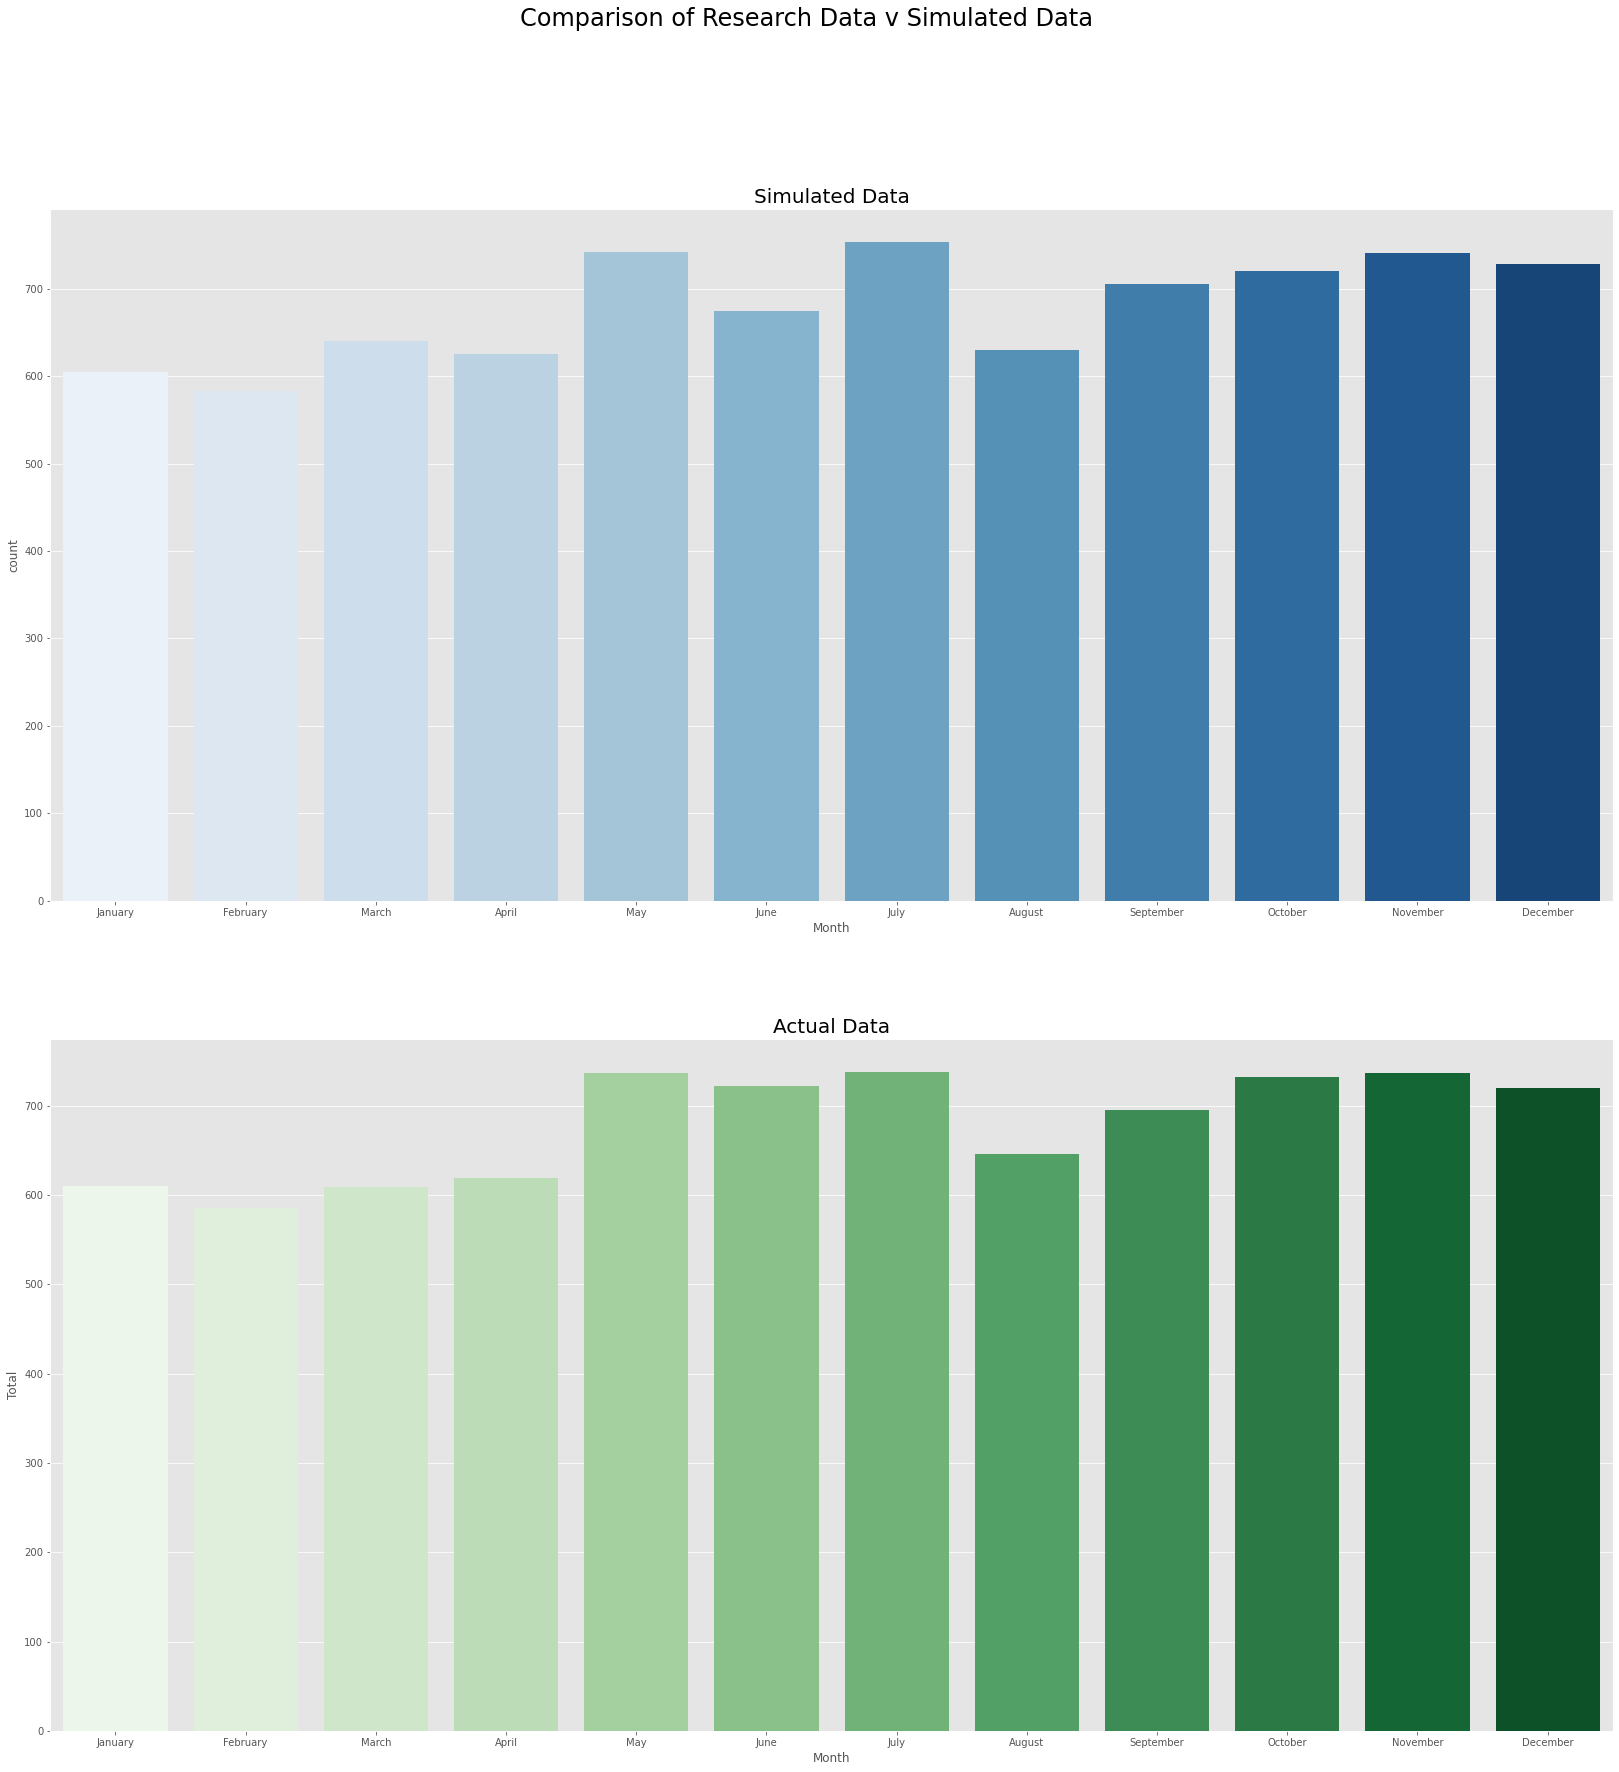

In [11]:
#plt.figure(figsize=(22,20))

plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(2,1,1)
plt.title('Simulated Data',fontsize=20)
sns.countplot(x='Month',data=month_df,palette='Blues',order=months)

plt.subplot(2,1,2)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Month',y='Total',data=Total_Monthly_2018_Collisions,ci=None,palette='Greens')

;

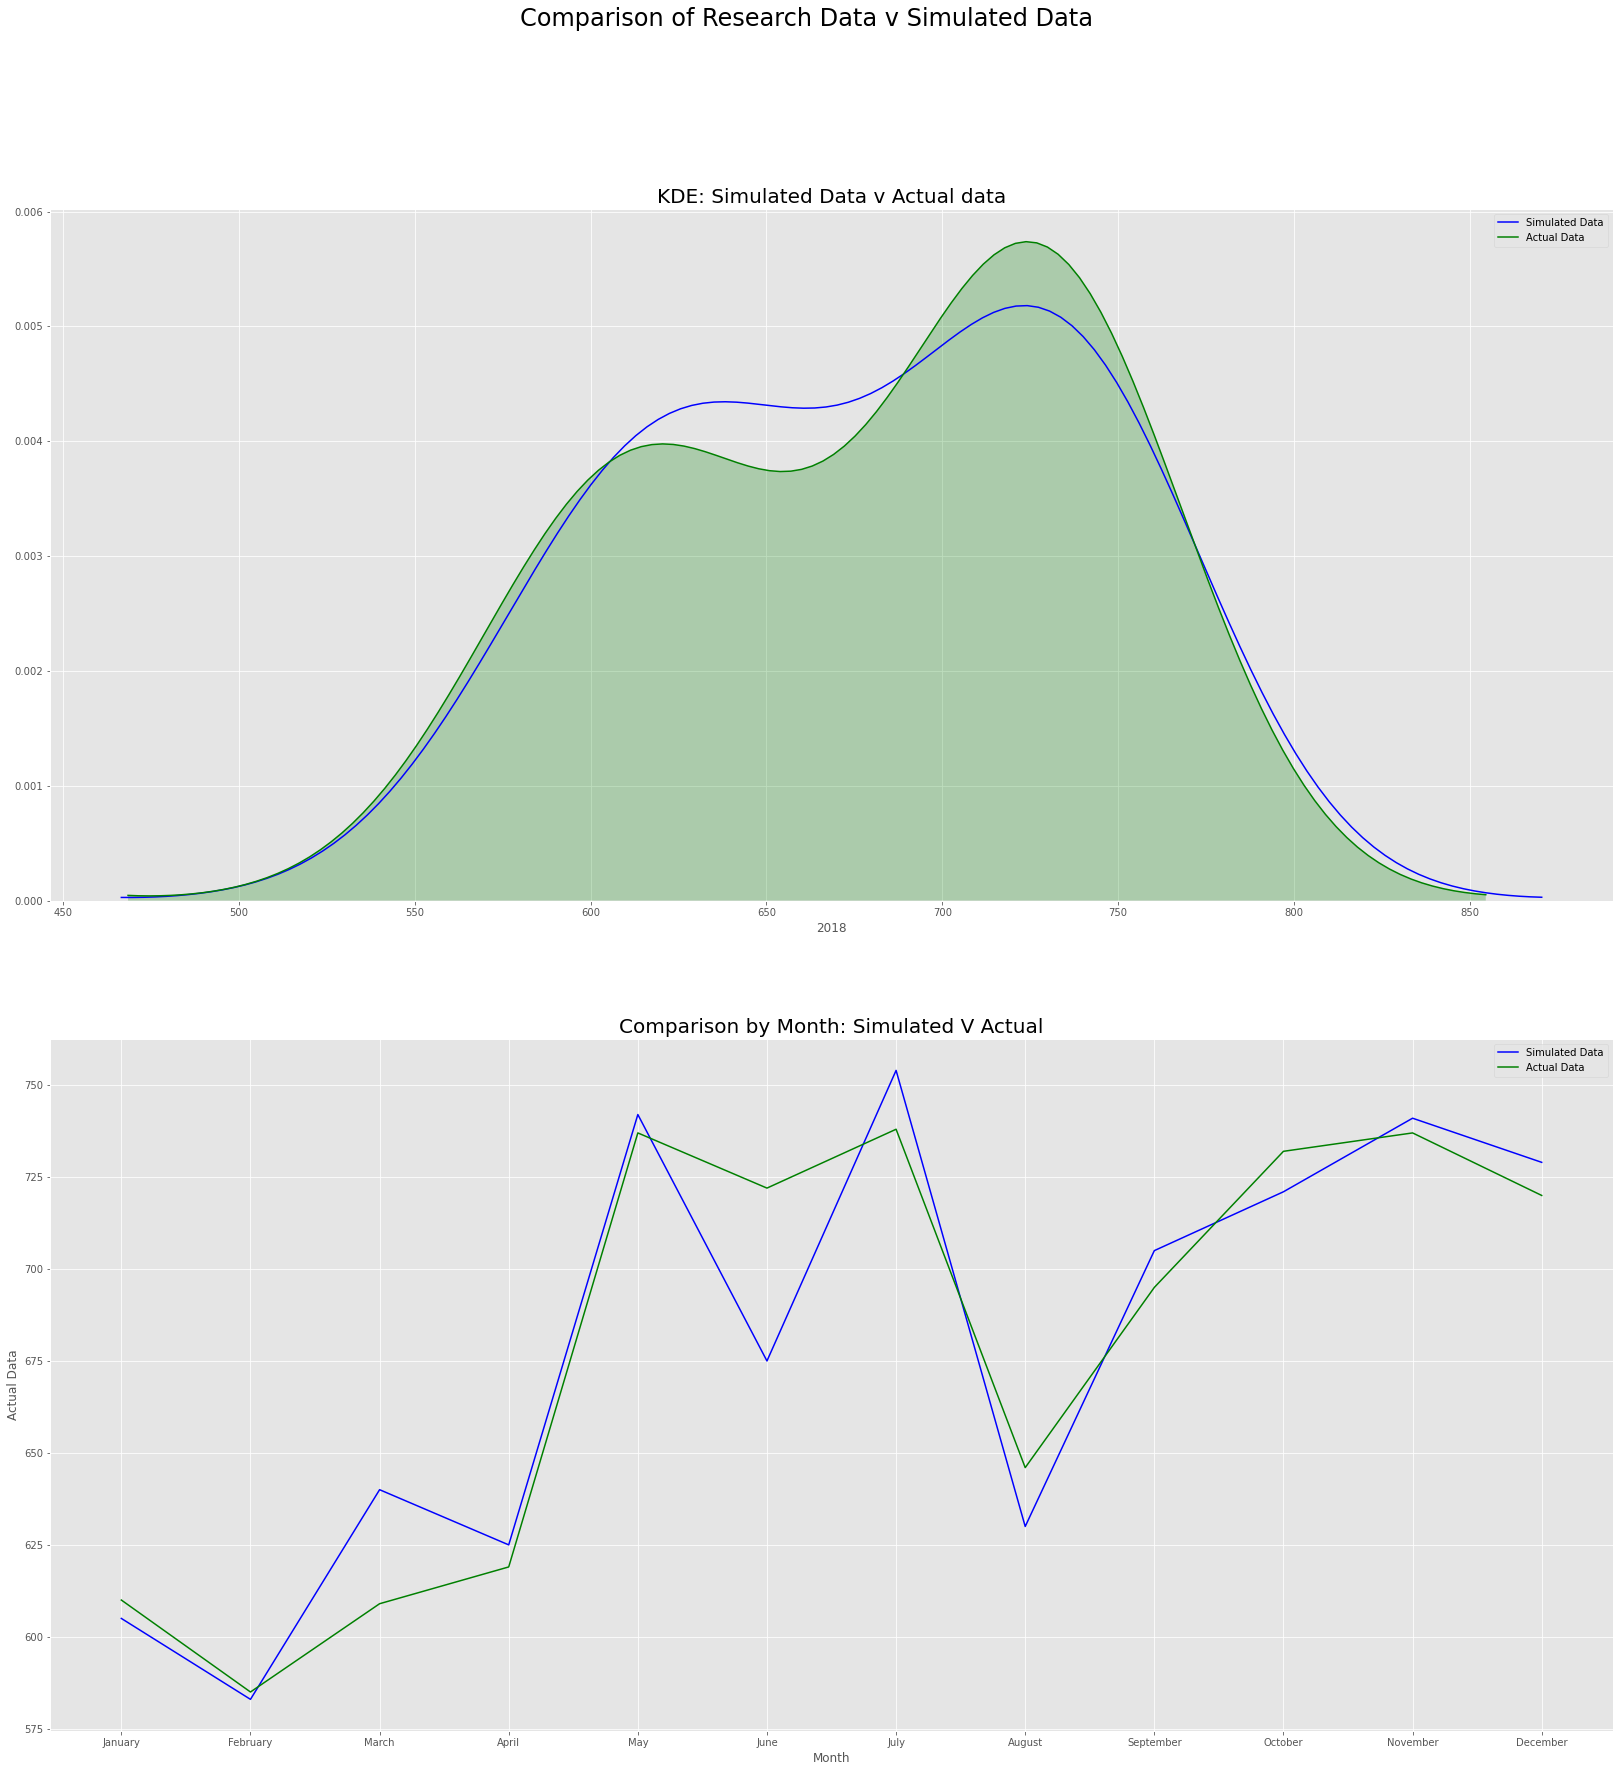

In [12]:
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(2,1,1)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(month_df['Month'].value_counts(),hist=False,color='Blue',label = 'Simulated Data')
sns.distplot(by_month_df.groupby('Month')['2018'].sum(),hist=False,color='Green',kde_kws={"shade": True}, label ='Actual Data')

plt.subplot(2,1,2)
plt.title('Comparison by Month: Simulated V Actual',fontsize=20)
sns.lineplot(x='Month',y='Simulated Data',data=month_compare_df,color='b',label='Simulated Data')
sns.lineplot(x='Month',y='Actual Data',data=month_compare_df,color='g',label='Actual Data');

#### Function to return *size* length of each month to form part of out main dataset

In [13]:
def size(df,col,m):
    "Function to return size of a months within a given dataframe"
    
    #length of the column values
    size = len(df[df[col]==m])
    
    #return the size
    return size

## By Day

Using the research data based on the collsions by day for 2018, we will distribute across our dataset based on % breakdown for each day. This will work ina function along with the Monthly *p* values to form our main dataset.

In [14]:
#imort collisions by day research data
by_day_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Day.csv')

In [15]:
by_day_df

,Day,Type,2014,2015,2016,2017,2018
0,Sunday,Fatalities,30,31,37,31,31
1,Sunday,Serious,1050,1076,1044,1062,995
2,Monday,Fatalities,26,20,20,38,18
3,Monday,Serious,1248,1172,1105,1065,1137
4,Tuesday,Fatalities,18,27,29,17,22
5,Tuesday,Serious,1143,1086,1094,1084,1145
6,Wednesday,Fatalities,25,20,25,17,17
7,Wednesday,Serious,1062,1122,1113,1130,1108
8,Thursday,Fatalities,38,19,32,10,15
9,Thursday,Serious,1113,1113,1040,1156,1203


#### List of Days 

This list is to produce an summary output descending by day order using *pd.Categorical*. Also, it will form part of a function that will distribute dates across each month.

In [16]:
##list of days to produce an output descending in month order of list and to form a dictionary along with Day p values
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#### % Breakdown by Day of Collisions from Research Data

In [17]:
day_collisions = by_day_df.groupby('Day')['2018'].sum()
total_day = sum(by_day_df.groupby('Day')['2018'].sum())
normalised_day = (day_collisions/total_day).to_frame('%').reset_index()
normalised_day['Day'] = pd.Categorical(normalised_day['Day'],categories=days, ordered=True)

normalised_day  = normalised_day.sort_values(['Day'])
normalised_day

,Day,%
1,Monday,0.141718
5,Tuesday,0.143190
6,Wednesday,0.138037
4,Thursday,0.149448
0,Friday,0.163190
2,Saturday,0.138528
3,Sunday,0.125890


#### % Breakdown by Day of Collisions from Research Data

In [18]:

day_collisions = by_day_df.groupby('Day')['2018'].sum()
#totals_day = sum(by_day_df.groupby('Day')['2018'].sum())
totals_day = (day_collisions).to_frame('Total').reset_index()
totals_day['Day'] = pd.Categorical(totals_day['Day'],categories=days, ordered=True)

totals_day  = totals_day.sort_values(['Day'])
totals_day

,Day,Total
1,Monday,1155
5,Tuesday,1167
6,Wednesday,1125
4,Thursday,1218
0,Friday,1330
2,Saturday,1129
3,Sunday,1026


#### Identifying *p* values for day distribution

In [19]:
#p-values to be used in function to create number of dates in each month
day_p_values = np.array(normalised_day['%'])
day_p_values

array([0.14171779, 0.14319018, 0.13803681, 0.14944785, 0.16319018,
       0.13852761, 0.12588957])

#### Dictionary of Day names and *p* values

In [20]:
#https://stackoverflow.com/questions/52207358/create-dictionary-from-two-numpy-arrays
day_p_dict= {}
for A,B in zip(days, day_p_values):
    day_p_dict[A] = B

In [21]:
day_p_dict

{'Monday': 0.14171779141104293,
 'Tuesday': 0.14319018404907977,
 'Wednesday': 0.13803680981595093,
 'Thursday': 0.1494478527607362,
 'Friday': 0.16319018404907976,
 'Saturday': 0.13852760736196318,
 'Sunday': 0.12588957055214725}

#### Date Function

The below functions takes each month and applies the day *p* values to create a date value to for our main dataset.


In [22]:
def dates(y,m,d,ml,sz):
    days = day_p_dict#{"Monday":0.14,"Tuesday":0.14,"Wednesday":0.14,"Thursday":0.14,"Friday":0.17,"Saturday":0.14,"Sunday":0.13}
    date_list = [(datetime.datetime(y, m, d) + datetime.timedelta(days=x)) for x in range(ml)]
    d = defaultdict(list)
    for i in date_list:
        d[i.strftime("%A")].append(i.strftime('%d/%m/%y'))
    
    result = np.random.choice(list(d.values()),
p=[days.get(i) for i in list(d.keys())],
                          size=sz)#,replace=False)
    
    
    final = [np.random.choice(i) for i in result]
    return final

#### Variables created by month from above function distributing days according to the day *p* values.

In [23]:
jan_dates = dates(2018,1,1,31,size(month_df,'Month','January'))
feb_dates = dates(2018,2,1,29,size(month_df,'Month','February'))
mar_dates = dates(2018,3,1,31,size(month_df,'Month','March'))
apr_dates = dates(2018,4,1,30,size(month_df,'Month','April'))
may_dates = dates(2018,5,1,31,size(month_df,'Month','May'))
jun_dates = dates(2018,6,1,30,size(month_df,'Month','June'))
jul_dates = dates(2018,7,1,31,size(month_df,'Month','July'))
aug_dates = dates(2018,8,1,31,size(month_df,'Month','August'))
sept_dates = dates(2018,9,1,30,size(month_df,'Month','September'))
oct_dates = dates(2018,10,1,31,size(month_df,'Month','October'))
nov_dates = dates(2018,11,1,30,size(month_df,'Month','November'))
dec_dates = dates(2018,12,1,31,size(month_df,'Month','December'))

In [24]:
#concatanation of above variables
date_concat = jan_dates+feb_dates+mar_dates+apr_dates+may_dates+jun_dates+jul_dates+aug_dates+sept_dates+oct_dates+nov_dates+dec_dates

#check if sizes are equal
print("Check if both are the same size")
len(date_concat) == len(month_df['Month'])

Check if both are the same size


True

### Creation of our main dataset
The first column will be the dates that were created from the month and day distributions from the research of the 2018 collision data. The date value will be converted into datetime from an object.

In [25]:
#dataset
df = pd.DataFrame(date_concat,columns=['Date'])

#converting dates generated from our function into datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

#display datatype of our date values
df.dtypes

Date    datetime64[ns]
dtype: object

#### Adding Day number, Day names and month name to our dataset`m

In [26]:
#daynames = []

#for d in date_concat:
 #   date=d
  #  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
   # dayz = datetime.datetime.strptime(date, '%d/%m/%y').weekday()
    #op = day_name[dayz]
    #daynames.append(op)

In [27]:
#monthnames = []

#for m in date_concat:
 #   date=m
  #  month_names= ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','Decemeber']
   # mths = datetime.datetime.strptime(date, '%d/%m/%y')
    #mn = mths.strftime("%B")
    #monthnames.append(mn)

In [28]:
#Day number
df['Day_Num'] = df['Date'].dt.dayofweek

#day name
df['Day'] = df['Date'].dt.day_name()

#month number
df['Month_Num'] = df['Date'].dt.month
#month name

df['Month'] = df['Date'].dt.month_name()

#check first 5 rows of dataset
print(df.head(5))
print(" ")
#check bottom 5 rows
print(df.tail(5))

        Date  Day_Num        Day  Month_Num    Month
0 2018-01-02        1    Tuesday          1  January
1 2018-01-29        0     Monday          1  January
2 2018-01-29        0     Monday          1  January
3 2018-01-04        3   Thursday          1  January
4 2018-01-03        2  Wednesday          1  January
 
           Date  Day_Num       Day  Month_Num     Month
8145 2018-12-31        0    Monday         12  December
8146 2018-12-10        0    Monday         12  December
8147 2018-12-15        5  Saturday         12  December
8148 2018-12-13        3  Thursday         12  December
8149 2018-12-10        0    Monday         12  December


#### % Breakdown by day from Simulated Data

In [29]:
df_day_collisions = df.groupby('Day')['Day'].count()
df_normalised_days = (df_day_collisions/sum(df_day_collisions)).to_frame('%').reset_index()
df_normalised_days['Day'] = pd.Categorical(df_normalised_days['Day'],categories=days,ordered=True)

df_normalised_days = df_normalised_days.sort_values(['Day'])

#### Breakdown by day totals from Simulated Data

In [30]:
df_day_collisions = df.groupby('Day')['Day'].count()
df_day_totals = (df_day_collisions).to_frame('Total').reset_index()
df_day_totals['Day'] = pd.Categorical(df_day_totals['Day'],categories=days,ordered=True)

df_day_totals = df_day_totals.sort_values(['Day'])

#### Comparison of Actual v Simulate Data by Day

In [31]:
days_for_compare = df_day_totals['Day']
simulated_day = df_day_totals['Total']
actual_day = totals_day['Total']

sim_days = pd.Series(simulated_day,name='Simulated Data')
actual_days = pd.Series(actual_day,name='Actual Data')

day_compare_df = pd.DataFrame(days_for_compare)
day_compare_df['Simulated Data'] = sim_days
day_compare_df['Actual Data'] = actual_days
day_compare_df['Variance'] = day_compare_df['Simulated Data']-day_compare_df['Actual Data']
day_compare_df['% Variance to Actual'] = round(day_compare_df['Variance']/day_compare_df['Actual Data'],3)


day_compare_df

,Day,Simulated Data,Actual Data,Variance,% Variance to Actual
1,Monday,1159,1155,4,0.003
5,Tuesday,1157,1167,-10,-0.009
6,Wednesday,1137,1125,12,0.011
4,Thursday,1164,1218,-54,-0.044
0,Friday,1420,1330,90,0.068
2,Saturday,1091,1129,-38,-0.034
3,Sunday,1022,1026,-4,-0.004


''

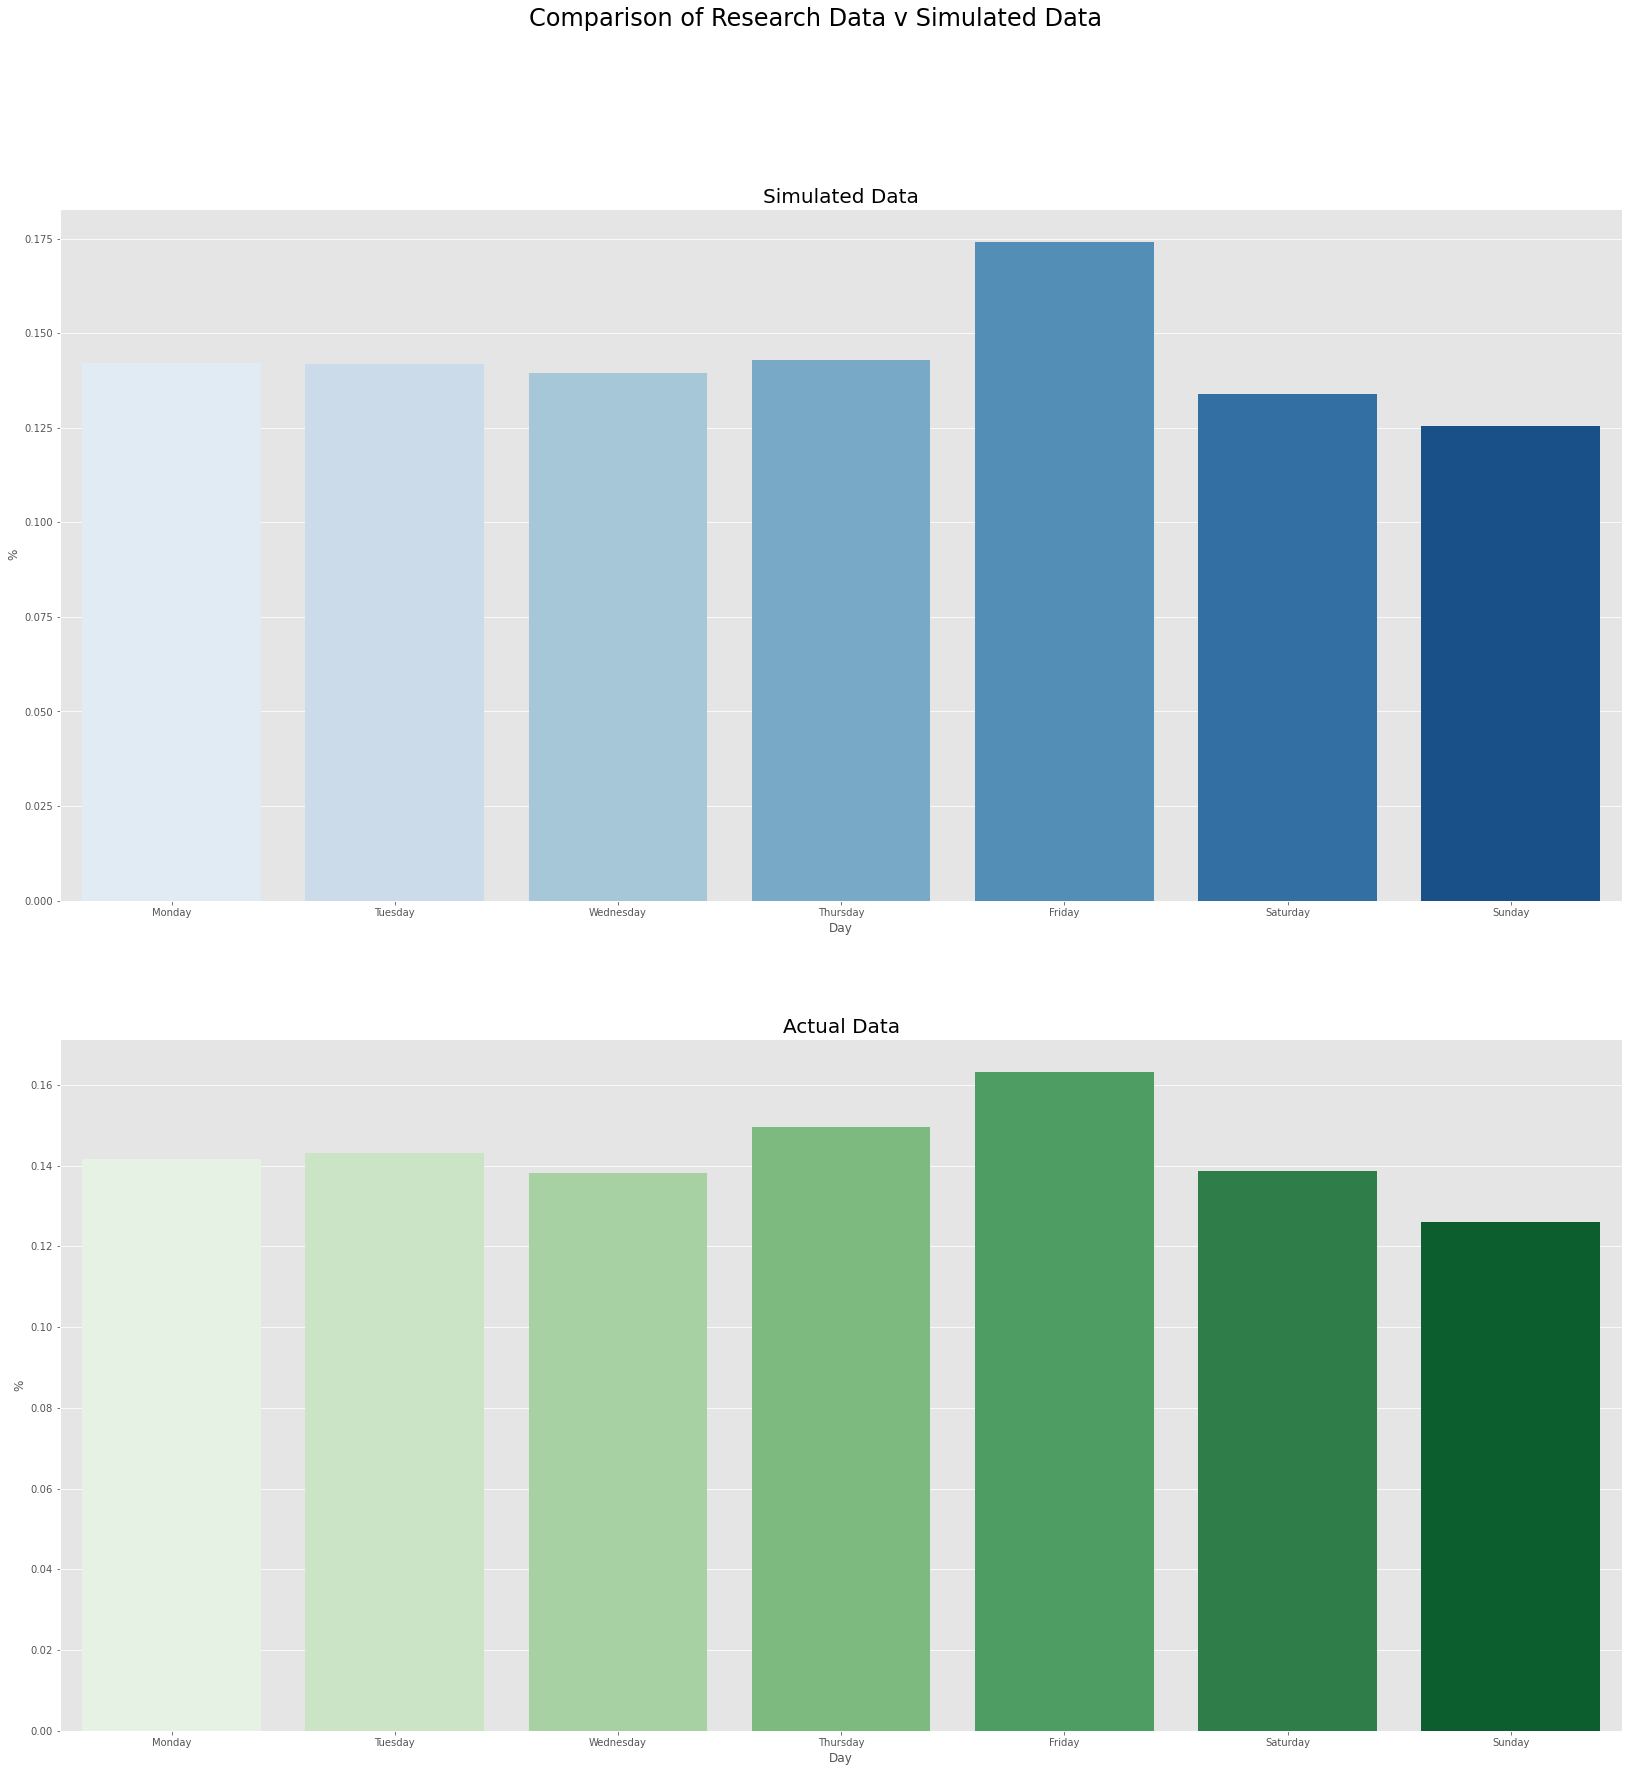

In [32]:
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(2,1,1)
plt.title('Simulated Data',fontsize=20)
sns.barplot(x='Day',y='%',data=df_normalised_days,palette='Blues')

plt.subplot(2,1,2)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Day',y='%',data=normalised_day,ci=None,palette='Greens')

;


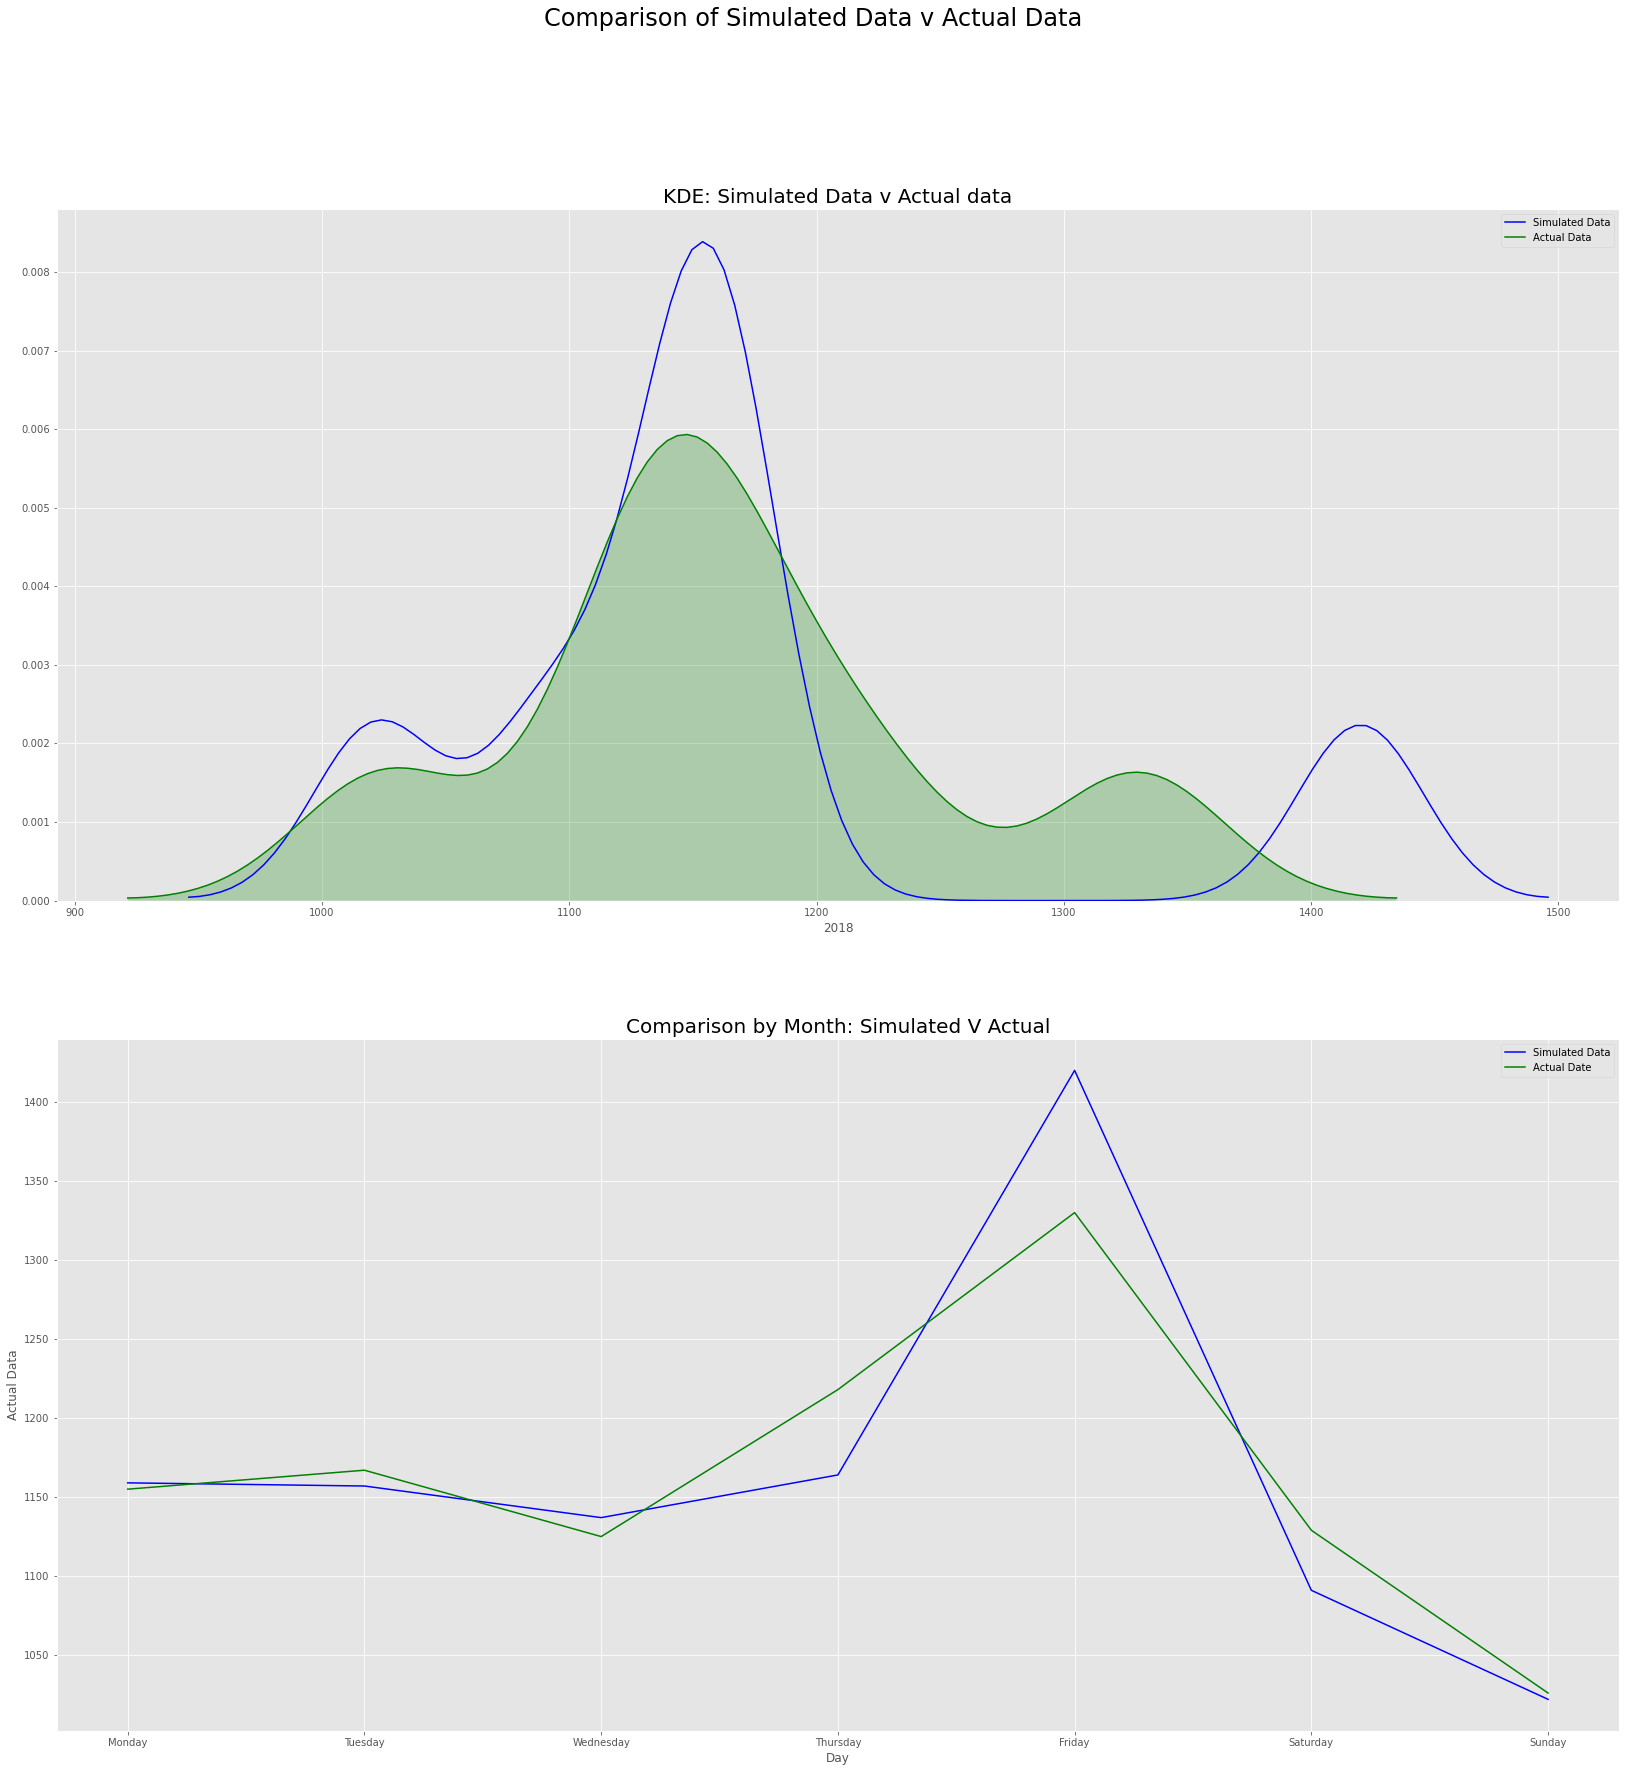

In [33]:
plt.suptitle('Comparison of Simulated Data v Actual Data',fontsize = 24)

plt.subplot(2,1,1)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(df['Day'].value_counts(),hist=False,color='Blue',kde_kws={"shade": False},label = 'Simulated Data')
sns.distplot(by_day_df.groupby('Day')['2018'].sum(),hist=False,color='Green',kde_kws={"shade": True}, label ='Actual Data')

plt.subplot(2,1,2)
plt.title('Comparison by Month: Simulated V Actual',fontsize=20)
sns.lineplot(x='Day',y='Simulated Data',data=day_compare_df,color='b',label='Simulated Data')
sns.lineplot(x='Day',y='Actual Data',data=day_compare_df,color='g',label='Actual Date');

In [34]:
#https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#bar-plot-of-column-values